## KAGGLE BIKE SHARE CHALLENGE - Exploratory Data Analysis (EDA)

For TpT Interview Assignment - June 2017

By: Divya Sriram

----------------

** For my reference: About the data set + Capital Bike Share Program: https://www.capitalbikeshare.com/**

-- 2011 to 2012

-- train set: 10886 data points (rows)

-- train set: includes 3 extra columsn (casual - nonmembers, registered - members, count)

-- test set: 6493 data points (rows)
 


-- can rent for 24 hours

** For my reference: Variables **
    
(1) datetime - hourly date + timestamp  

(2) season 1 = spring, 2 = summer, 3 = fall, 4 = winter (??questionable)

(3) holiday - whether the day is considered a holiday

0 = not a holiday, 1 = holiday

(4) workingday - whether the day is neither a weekend nor holiday

1 = workday, 0 = holiday/weekend

(5) weather:

1: Clear, 2: Mist, 3: Light Snow, Light Rain , 4: Heavy Rain

(6) temp - temperature in Celsius

(7) atemp - "feels like" temperature in Celsius

(8) humidity - relative humidity

(9) windspeed - wind speed

(10) casual - number of non-registered user rentals initiated

(11) registered - number of registered user rentals initiated

(12) count - number of total rentals

## The More I Look at the Data, The More Questions I Have!

(1) Where is the weather information coming from? I'm **assuming** a credible source, but what if it's like Fox news (I apologize for the political reference)

(2) Why did they choose to divide the train and test set in that way (first 2/3 of the month and last 1/3 of the month)?

(3) According to this data set, season 1 = spring, which according to the data set, contains the months of January through March. And summer is season 2, months of April - June, fall is season 3, months of July - Sept, and winter is season 4, October - December. Am I the only one that thinks this categorization is incorrect??

According to https://www.nationalgeographic.org/encyclopedia/season/ (a source most would consider credible), the division of the seasons for this data set is incorrect.

(4) Why did they choose to not include a categorical variable for biking events in the area during that hour/day? This seems like an important factor in influencing the # of bike rentals.

## Assumptions We're Making / Biases!

There are over hundreds of assumptions made in every model, it is innately how the world of 'classification' curses the field of data science. But it's better to be aware of these assumptions and work towards acknowleding and later correcting them. Here are a few of the many assumptions with our training and test set data/model.

(1) What if our training model takes into account only locals? And it happens to be that the test set (later 1/3 of the month) contains more holidays or people take more days off --> this would increase potential visitors and tourists who might be more likely to rent a bike no matter the weather because it's their only chance.

(2) If more bikes are rented when there is a bike event in the area (an assumption to prove an assumption, I know) then the way we have split our training and test set assumes that bike events are equally likely to happen in either part of the month.

-----------------

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

In [79]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns

In [4]:
# Read in training and dev data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
print train.shape
print test.shape

(10886, 12)
(6493, 9)


In [65]:
#create new data frames and keep original train and test sets intact for reference

train_data = train
test_data = test

#separating dates into year, month, day, hour
train_data["datetime"] = pd.to_datetime(train_data["datetime"])
train_data["year"] = train_data["datetime"].dt.year
train_data["month"] = train_data["datetime"].dt.month
train_data["day"] = train_data["datetime"].dt.day
train_data["hour"] = train_data["datetime"].dt.hour

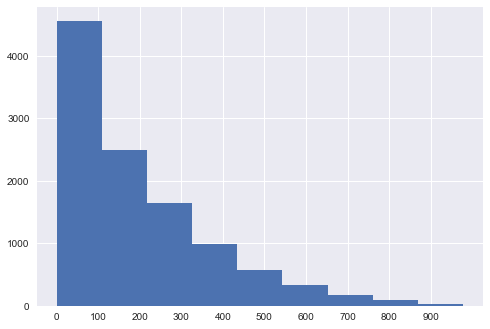

In [142]:
num_bins = 10 # <-- Change here - Specify total number of bins for histogram
plt.hist(train_data['count'], bins=np.linspace(np.min(train_data['count']), np.max(train_data['count']), num=num_bins)) 
xrange = range(0,1000,100)
plt.xticks(xrange)
plt.show()

Looks like majority of the records seem to have 0-200ish rentals per hour and much less have 700+.

In [187]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.506316,0.028939,0.680409,1.418810,20.243962,23.670858,61.682935,12.820467,36.209692,156.479329,2011.504364,6.520671,9.960726,11.561553
std,1.119620,0.167644,0.466345,0.633617,7.822020,8.502251,19.272563,8.162268,50.159423,150.897841,0.500010,3.450769,5.455065,6.902361
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,38.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,12.998000,17.000000,119.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,224.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,2012.000000,12.000000,19.000000,23.000000


Let's take a quick look at how the data looks. I usually scan to check for obvious signs of missing data, gaps in the data, etc.


In this case, because our various elements of data are with reference to each hour of the day, it's important to check and see if we have repeated hours or missing hours.

In [47]:
train_data.head(75)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9


Things to note:

(1) This sample of 50 rows of data already reveals gaps in the data. 

Note for example:
January 3rd of 2011 has data for the 1st, 2nd, 5th hour, etc. However it is missing hour 3 and 4.


(2) People rent bikes at odd hours...

I was deciding whether to fill in those missing hours (0 rentals) or to leave the training set with missing hours. I was expecting that maybe the missing hours are 12am-6am or so but it looks like people rent at those hours as well. Interesting...let's do a binning for these hours to see if there's a spread in time of day

(3) I am leaving the training set as is (with the missing hours) because:

-> I am unsure as to why those hours are missing

-> To assume that they had 0 rentals could be incorrect

-> Hours could have not been recorded due to some error in the system

-> I have no way of tracking the other elements of data (other column variables) so I can't fill that data in

In [104]:
train_data['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [110]:
train_data.month.value_counts()

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

With the exception of the month of January, all the other months have around similar entries for each month. This is important for training our model later because a significantly higher skew towards one month of the other could influence the model differently. (Note to self: like Airbnb model and NDF).

In [115]:
train_data.day.value_counts()

1     575
9     575
5     575
17    575
15    574
19    574
16    574
7     574
8     574
4     574
13    574
14    574
3     573
2     573
12    573
10    572
6     572
11    568
18    563
Name: day, dtype: int64

Along the same lines of checking the distribution of entries for each month, the entries for each day is just as important in reference to training our model.

In [117]:
train_data.hour.value_counts()

23    456
20    456
16    456
17    456
18    456
15    456
12    456
19    456
13    456
21    456
14    456
22    456
6     455
11    455
10    455
9     455
7     455
8     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

Last but not least, distribution of records by the hour is most crucial as we are determining our output variable based on this.

Though I am happy that the distribution is relatively similar for the purposes of training the machine learning model I'm shocked to see that just as many records have been collected for these odd hours of the late night and early morning. 

In the cell below, we can see just from hour 0 that there are many people are renting bikes from 12am-1am in the morning. One hypothesis is that this bike share can be kept over night, so maybe people forgot to return them or are keeping them to use for the later part of the morning?

So it is possible to rent the bike for 24 hours: https://www.capitalbikeshare.com/

In [118]:
train_data.groupby('hour')['count'].value_counts()

hour  count
0     31       12
      39       12
      17       11
      23       10
      34       10
      15        9
      25        9
      47        9
      24        8
      37        8
      43        8
      53        8
      14        7
      16        7
      29        7
      33        7
      35        7
      38        7
      13        6
      21        6
      22        6
      28        6
      30        6
      41        6
      48        6
      8         5
      20        5
      26        5
      27        5
      32        5
               ..
23    161       1
      163       1
      164       1
      168       1
      169       1
      170       1
      172       1
      174       1
      176       1
      178       1
      179       1
      180       1
      185       1
      186       1
      192       1
      195       1
      198       1
      199       1
      205       1
      212       1
      215       1
      220       1
      226       1
      229       

In [48]:
train_data['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [49]:
train_data.loc[train['count'] == 1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
30,2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1,1,2011,1,2,7
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,2011,1,3,4
71,2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1,1,2011,1,4,2
118,2011-01-06 04:00:00,1,0,1,2,6.56,9.850,64,6.0032,0,1,1,2011,1,6,4
140,2011-01-07 02:00:00,1,0,1,2,8.20,9.850,69,15.0013,0,1,1,2011,1,7,2
141,2011-01-07 04:00:00,1,0,1,2,8.20,10.605,69,8.9981,0,1,1,2011,1,7,4
165,2011-01-08 04:00:00,1,0,0,3,7.38,9.850,55,11.0014,0,1,1,2011,1,8,4
189,2011-01-09 04:00:00,1,0,0,1,3.28,4.545,53,12.9980,0,1,1,2011,1,9,4


In [37]:
X =[1]
train_data[train_data['count'].isin(X)].groupby('hour')['count'].value_counts()

hour  count
1     1         4
2     1        15
3     1        28
4     1        45
5     1         9
6     1         3
7     1         1
Name: count, dtype: int64

Looking at all the rows that have 1 rental for that hour, it seems like they generally occur in the wee hours of the morning (12am-7am)

In [51]:
train_data.loc[train['count'] == 977]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.06,44,16.9979,91,886,977,2012,9,12,18


The most amount of rentals made was September 12, 2012 from 6-7pm. That's almost 1000 people that all rented during this hour. Let's do a little google to see if some event was happening during Sept 12, 2012.

According to this flyer: http://dcbikeparty.com/wp-content/uploads/2012/09/DCBP-Press-Release-September-Ride.pdf and some other  articles, there was a DC Bike Party that occured with a meet up time of 7:30pm - so this aligns as a possible reason as to this huge spike in bike shares at this time during this day!

----------------------------

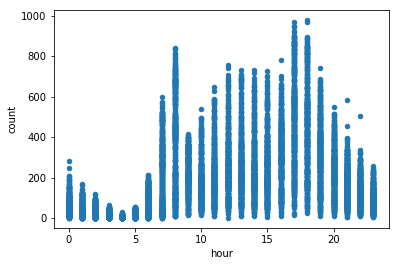

In [62]:
train_data.plot(x='hour', y='count', kind='scatter')

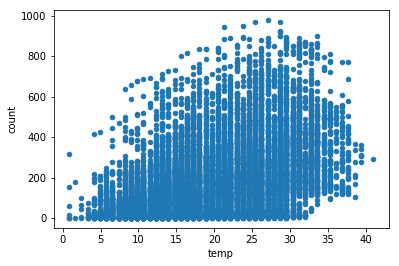

In [52]:
train_data.plot(x='temp', y='count', kind='scatter')

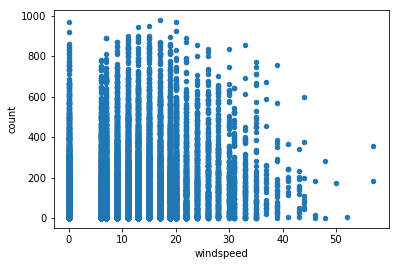

In [53]:
train_data.plot(x='windspeed', y='count', kind='scatter')

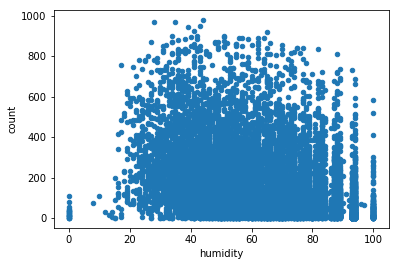

In [54]:
train_data.plot(x='humidity', y='count', kind='scatter')

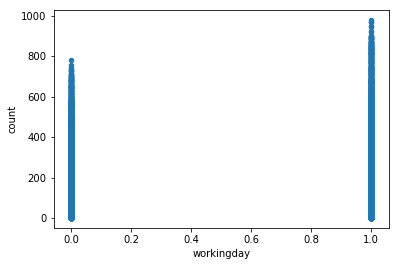

In [67]:
train_data.plot(x='workingday', y='count', kind='scatter')

In [71]:
train_data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [69]:
train_data.groupby('workingday')['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

It's interesting that more rentals were made during the hours of a workday, but then again there are more than twice as many working days as holidays/weekends. In general though, the average number of rentals made in either category is not vastly different.

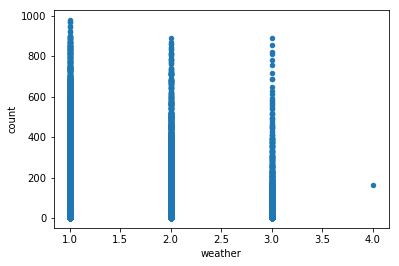

In [55]:
train_data.plot(x='weather', y='count', kind='scatter')

In [56]:
train_data.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [57]:
train_data.loc[train['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18


There is only one hour in which 164 apparent brave souls rented bikes when the weather was **4** or 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' which was recorded from 6-7pm on January 9th, 2012.

Thus far, the scatterplots for temp and wind follow a slight trend as I expected (generally/roughly stated below)

--> higher temp, more bike rentals (until about 30 C)

--> higher windspeeds, fewer bike rentals

Humidity was surprising though, I couldn't find a general pattern. My guess(?) is that humidity generally does remain a factor of weather that is least prepared for (ex: people check the temp and make decisions based on that more often than humidity). 


Because some of our data columns are numerical, we can run some correlations to give us an idea of how these variables are associated (if they are) with each other - paying close attention to the relationship between each variable and count, our predictor variable. This will help is having a vague idea of what factors to include in our machine learning models later.

**Some columns, example: seasons, have numerical values but are actually categorical, not continuous numerical variables. **

In [58]:
train_data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540


(ignoring casual and registered and categorical) 

The variables with the highest correlation to count are **hour**, **temp**, and **atemp** both right around **0.40**, **0.39**, and **0.39** respectively. 

Temp and atemp are highly correlated (reasonably so) - so if these are variables of influence in the machine learning model, I might only include one or the other, to keep a simpler model (fewer variables, Occam's razor).

It is interesting that month and day don't have much, if any, correlation with bike rentals. However, having the day not correlate to counts could be beneficial because I was worried that the test set consists of the last 1/3 of the month which could be drastically different and influence value counts than the first 2/3 of the month (like that of the training set) but the lack of correlation between days and counts in the training set is in some way reassuring.

In [211]:
train_data.groupby('season')['temp'].describe()
#season 1 = spring
#season 2 = summer
#season 3 = fall
#season 4 = winter

season       
1       count    2686.000000
        mean       12.530491
        std         5.186492
        min         0.820000
        25%         9.020000
        50%        12.300000
        75%        16.400000
        max        29.520000
2       count    2733.000000
        mean       22.823483
        std         5.159616
        min         9.840000
        25%        18.860000
        50%        22.960000
        75%        26.240000
        max        38.540000
3       count    2733.000000
        mean       28.789111
        std         3.898157
        min        15.580000
        25%        26.240000
        50%        28.700000
        75%        31.160000
        max        41.000000
4       count    2734.000000
        mean       16.649239
        std         4.742176
        min         5.740000
        25%        13.120000
        50%        16.400000
        75%        20.500000
        max        30.340000
Name: temp, dtype: float64

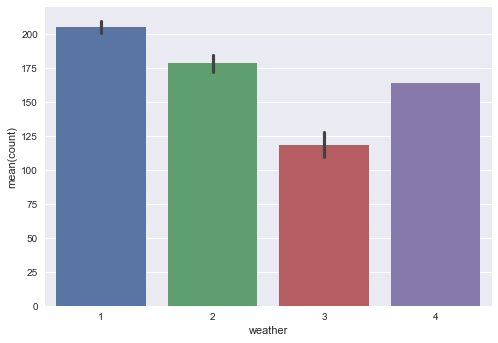

In [82]:
sns.barplot(x="weather", y="count", data=train_data);
#weather does play a role in the trend of bike rentals

It's surprising to see that on average, more bike rentals were made in weather 4 (harshest weather) than weather 3, but keep in mind there was only 1 hour recorded so it's only value is represented in the graph above.

It bothers me that there is this one odd exception for weather 4, so let's try to see why it's there and with a significant amount of bike shares.

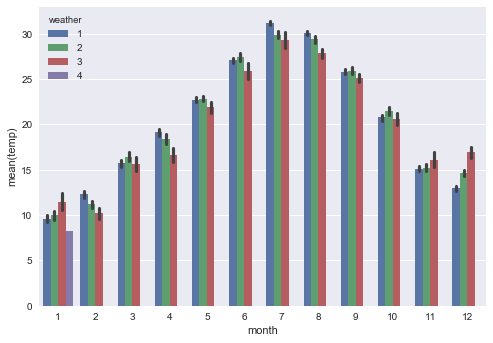

In [97]:
sns.barplot(x="month", y = 'temp', hue="weather", data=train_data);

One guess is that maybe a group of people had decided to rent bikes that day and the weather was predicted incorrectly?

**Another guess is that there might have been an cycling event on that day that people decided to partake in regardless of the weather situation. I tried looking up bike events that occurred on January 9th, 2012 in DC, but could not find a specific event - this doesn't discredit this hypothesis though**

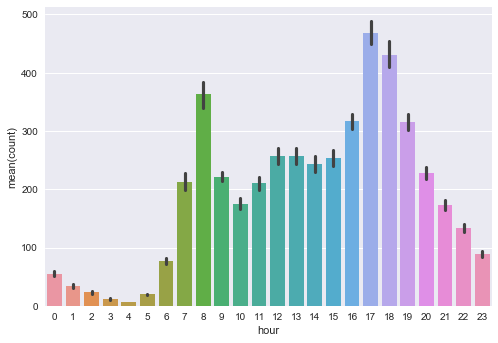

In [87]:
sns.barplot(x="hour", y="count", data=train_data);
#hour does play a role in the trend of bike rentals

In general, it's not surprising to me that there are more rentals from "7 - 19" or 7am-8pm, makes sense - most people don't want to bike at non day light hours.

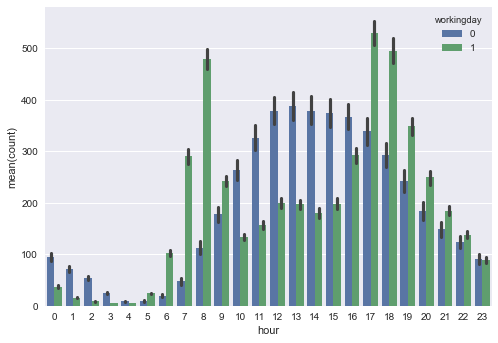

In [92]:
sns.barplot(x="hour", y = 'count', hue="workingday", data=train_data);

I was curious to see how working day fits into the hour of the day. My assumption (a big assumption in that most of these people are working, and if they are - they work 9-5ish jobs) would be that in general, on workingdays, more people would rent bikes before or after work. On a holiday or the weekend, I expected that there would more activity mid day (no work). 

I think the graph tends to show something like that. I'm curious to know if the peaks for rentals during the hours of 6-8am and 5-8pm on workdays might correspond to people who bike to work?!

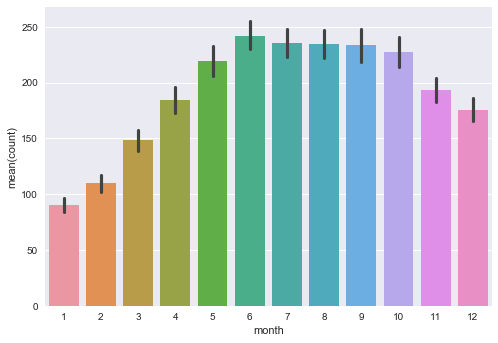

In [88]:
sns.barplot(x="month", y="count", data=train_data);
#month does play a role in the trend of bike rentals

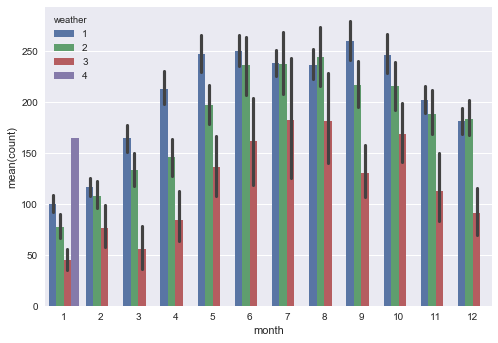

In [99]:
sns.barplot(x="month", y = 'count', hue="weather", data=train_data);

From earlier graphs, I could tell that both month and weather influenced bike rental counts, but I wanted to know if people went based on average weather for that month or if the data shows nuanced peaks for rentals BASED on different weather DURING that month.

In general, it looks like in each month (with the exception of January), weather 1 (nicest weather) seems to bring the most amount of rentals - which makes sense. Also, looking at weather 3, more people prefered to bike during weather 3 during the months of 5-9 (May to September) when the temperature tends to be nice is my guess, let's check in the next plot. This was a good sanity check to make sure that the people renting these bikes were in fact like most humans who prefer to ride in nice weather when possible.

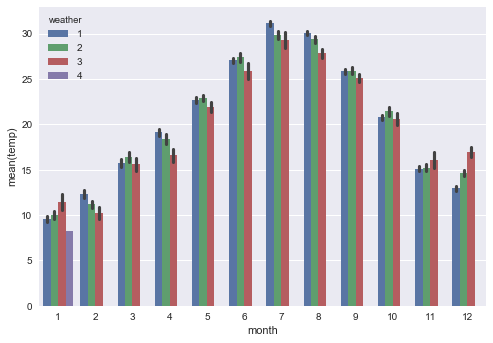

In [96]:
sns.barplot(x="month", y = 'temp', hue="weather", data=train_data);

I mentioned as a comment from the result of graphing counts against month separated by weather that the temperature is likeley better for the months of 5-9, which corresponds to the summer months and why even weather 3 (not so great weather) has more rentals during these months than weather 3 during other months. 

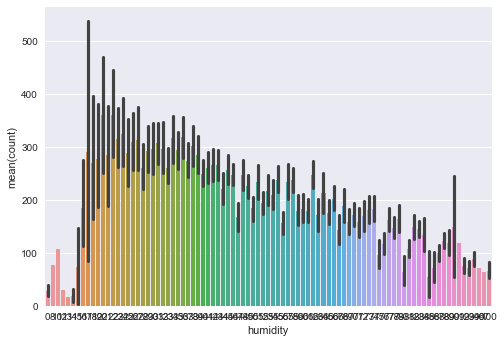

In [89]:
sns.barplot(x="humidity", y="count", data=train_data);
#humidity does play a role in the trend of bike rentals

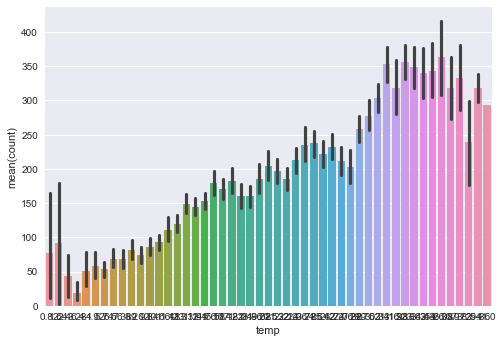

In [90]:
sns.barplot(x="temp", y="count", data=train);
#temp does play a role in the trend of bike rentals

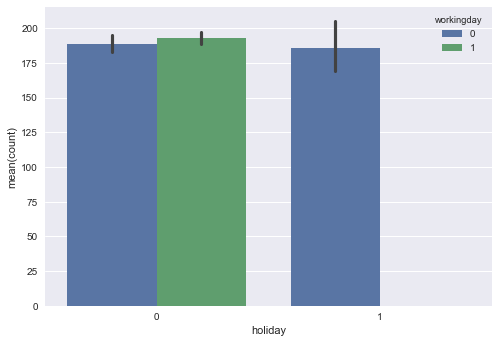

In [109]:
sns.barplot(x="holiday", y="count", hue = "workingday", data=train_data);


This may seem silly, but this is a little sanity check. I wonder if separating the two categories: holiday from workingday is supposed to play an important role in the data set. In this plot, a working day is clearly not going to be in the holiday category, and the bar plot does display that so this is a check that our data is relatively reliable.

But even within these categories: holiday, workingday, weekend: the average rentals seem to be relatively similar.

In [197]:
test.head(50)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


In [167]:
#prep the test set like we did train_data
test_data = test
test_data["datetime"] = pd.to_datetime(test_data["datetime"])
test_data["year"] = test_data["datetime"].dt.year
test_data["month"] = test_data["datetime"].dt.month
test_data["day"] = test_data["datetime"].dt.day
test_data["hour"] = test_data["datetime"].dt.hour

In [168]:
print "The size of the training data set is: ", train_data.shape
print "The size of the dev data set is: ", dev_data.shape
print "The size of the test data set is: ", test.shape

The size of the training data set is:  (8708, 15)
The size of the dev data set is:  (2178, 15)
The size of the test data set is:  (6493, 13)


Counts

Trying Some Models - Primary Rounds

In [174]:
# Define a function that will encode columns for decision tree
def label_encode(df, cols):
    le = preprocessing.LabelEncoder()
    for elem in cols:
        df[[elem]] = le.fit_transform(df[[elem]]) 
    return df

# initial crack at variable selection
cols = ['season','holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']

dt_train = train_data[cols]
label_encode(dt_train, cols)

dt_dev = dev_data[cols]
label_encode(dt_dev, cols)

# Preprocess train & dev labels for decision tree
le = preprocessing.LabelEncoder()
dt_train_labels = le.fit_transform(train_labels)
dt_dev_labels = le.fit_transform(dev_labels)

/Users/divyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: shape mismatch: value array of shape (8708,) could not be broadcast to indexing result of shape (1,8708)

In [ ]:
def decision_tree(train_data, train_labels, dev_data, dev_labels, best_sample):
    sample_sizes = [25, 50, 75, 100, 250, 300, 400, 500, 750, 1000]
    scores = []
    max_score = [0, 0]
    important_feat = []
    num_unique = []
    for elem in sample_sizes:

        # Fit decision tree model
        dt = DecisionTreeClassifier(criterion="gini", min_samples_split=elem, random_state=99)
        dt.fit(dt_train, dt_train_labels)

        # Predict with decision tree
        preds = dt.predict(dt_dev)
        if elem == best_sample:
            pred_values_nodesplit500 = preds
            dt_dev_labels_nodeplit500 = dt_dev_labels

        # Catalog the unique values & scores predicted for each sample size
        unique = pd.Series(preds).unique()
        num_unique.append(len(unique))
        score = dt.score(dt_dev, dt_dev_labels)
        scores.append(score)

        # Track the max score & what sample size was used, as well as
        # the feature importances for the best score
        if score > max_score[1]:
            max_score = [elem, score]
            important_feat = dt.feature_importances_ 
            max_score_global = max_score[1]

    # Output best score
    print "PREDICTING ON DEV DATA:"
    print "Best score is %.3f with sample size of %d" % (max_score[1], max_score[0])
    return sample_sizes, scores, num_unique, important_feat, dt_dev_labels_nodeplit500, pred_values_nodesplit500

# Call function
sample_sizes, scores, num_unique, important_feat, dt_dev_labels_nodeplit500, pred_values_nodesplit500 = decision_tree(dt_train, dt_train_labels, dt_dev, dt_dev_labels, 750)


# Create plot to show relationship between minimum size for split & accuracy
plt.figure(figsize=(2,3))
fig, (ax0, ax1) = plt.subplots(ncols=2)
fig.suptitle("Evaluation of Increasing Size for Node Split", y = 1, fontsize=14)
fig.text(0.5, 0, "Minumum Size for Node Split", ha='center')

ax0.plot(sample_sizes, scores, 'b', label='Accuracy', linewidth=3)
ax0.set_title("Accuracy", fontsize=10)

ax1.plot(sample_sizes, num_unique, 'g', label='Unique Predictions', linewidth=3)
ax1.set_title("Unique Predictions", fontsize=10)

plt.show()

KNN

In [184]:
def KNN_Model(k_values):

    cols = ['season','holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']

    knn_train = train_data[cols]
    knn_dev = dev_data[cols]
   
    
    #for loop for each value of k
    for k in k_values:
        
        #setting up, fitting, and predicting KNeighbors model
        KNNC = KNeighborsClassifier(n_neighbors=k, weights="uniform")
        KNNC.fit(knn_train, train_labels)
        predknn = KNNC.predict(knn_dev)

        #calculating accuracy
        correct, total = 0, 0
        for pred, label in zip(predknn, dev_labels):
            if pred == label: correct += 1
            total += 1
            
        print 'When k = %3d  total: %3d  correct: %3d  accuracy: %3.2f' %(k, total, correct, 1.0*correct/total)

        
k_values = [1,1000]
KNN_Model(k_values)

When k =   1  total: 2178  correct:  23  accuracy: 0.01
When k = 1000  total: 2178  correct:  53  accuracy: 0.02


Logistic Regression

In [186]:
def LogReg_Model(logreg_train_data, logreg_train_labels, logreg_dev_data, logreg_dev_labels):
    
    # LOGISTIC REGRESSION
    log = LogisticRegression()
    
    C_options = {'C': np.arange(0.1, 1, 0.1)}
    log_grid = GridSearchCV(log, C_options)

    log_grid.fit(logreg_train_data, logreg_train_labels)
    log_preds = log_grid.predict(logreg_dev_data)
    
    # Output best param
    print "Best value for C: %.2f" %log_grid.best_params_['C']
    print "F1 score for Logistic Regression: %.3f" %metrics.f1_score(dev_labels, log_preds, average="weighted") + "\n"
    

LogReg_Model(train_data[:2000], train_labels[:2000], dev_data[:2000], dev_labels[:2000])

/Users/divyas/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


TypeError: float() argument must be a string or a number

In [ ]:
 def mod_test3(train_data, train_labels, dev_data, dev_labels):
    mult = MultinomialNB(alpha = 1)
    # floor converts data into a discrete-like set
    mult.fit(dig_mini_train_data, mini_train_labels) 
    mult_score = mult.score(dig_dev_data, dev_labels) 
    
  
    print 'bernoulli accuracy: %3.2f' %bern.score(dev_data, dev_labels)
    print 'multinomial accuracy: %3.2f' %mult_score
    
    print '\n'
    plt.hist(dev_data)
    
mod_test2(train_array[:2000], train_label_array[:2000], dev_array[:2000], dev_label_array[:2000])

https://docs.google.com/a/berkeley.edu/document/d/18gn4CiMYzy9eSHrxF3m0BbfQIJlWZWD-w2Epu8TTeZU/edit?usp=sharing

https://www.dataquest.io/blog/kaggle-tutorial/

http://blog.kaggle.com/2016/07/21/approaching-almost-any-machine-learning-problem-abhishek-thakur/